# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus.reader.wordnet import NOUN
from nltk.corpus import wordnet

from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

nltk.download('stopwords')
STOP_WORDS = list(stopwords.words('english'))

import re

import sklearn
from sklearn.model_selection import train_test_split


from PIL import Image

[nltk_data] Downloading package wordnet to C:\Users\Lokesh
[nltk_data]     J\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Lokesh
[nltk_data]     J\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
data = pd.read_csv('fake reviews dataset.csv')
data

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


# Word Cloud

In [25]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/301.2 kB 825.8 kB/s eta 0:00:01
   ------------------------------------ --- 276.5/301.2 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


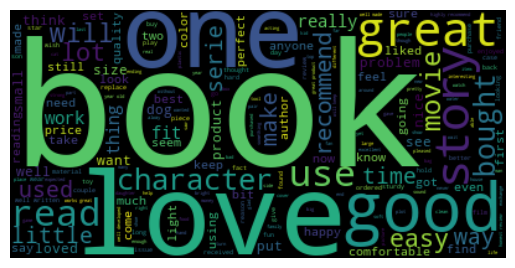

In [15]:
# Create and generate a word cloud image:

# stopwords = set(STOPWORDS)
# stopwords.update(["one"])
from wordcloud import WordCloud 
# Generate a word cloud image
# wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(data.text_)


list1 = list(data.text_)
list1
wordcloud = WordCloud().generate(' '.join(x for x in list1))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
wordcloud.to_file("Word_Cloud.png")

In [19]:
data.sample(frac=1)

,category,rating,label,text_
17051,Tools_and_Home_Improvement_5,5.0,OR,Finally gave in and bought it. Takes all the g...
8128,Electronics_5,5.0,OR,Love these. Use them for anything touch-screen...
12416,Movies_and_TV_5,4.0,OR,"Interesting flick, not much like the other Coe..."
37595,Clothing_Shoes_and_Jewelry_5,1.0,OR,i haven't even used it for two weeks and the r...
9612,Electronics_5,5.0,CG,"Fantastic charger, its worked perfectly and ha..."
...,...,...,...,...
12942,Movies_and_TV_5,4.0,CG,"Good addition to ""Into the Woods"" series. Not..."
17040,Tools_and_Home_Improvement_5,5.0,OR,This was used in a daycare to secure a small f...
37886,Clothing_Shoes_and_Jewelry_5,5.0,CG,Button front cardigans in cotton and stretchy....
25375,Kindle_Store_5,3.0,OR,It's a decent read though not the normal type ...


# Data Overview

In [21]:
data.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [23]:
data.shape

(40432, 4)

In [25]:
round(data.describe(), 2)

,rating
count,40432.00
mean,4.26
std,1.14
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


In [27]:
data.label.value_counts()

label
CG    20216
OR    20216
Name: count, dtype: int64

C:\Users\Lokesh J\AppData\Local\Temp\ipykernel_9072\1847110258.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
C:\Users\Lokesh J\AppData\Local\Temp\ipykernel_9072\1847110258.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['category'].value_counts()[i],ha="center")
C:\Users\Lokesh J\AppData\Local\Temp\ipykernel_9072\1847110258.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['category'].value_counts()[i],ha="center")


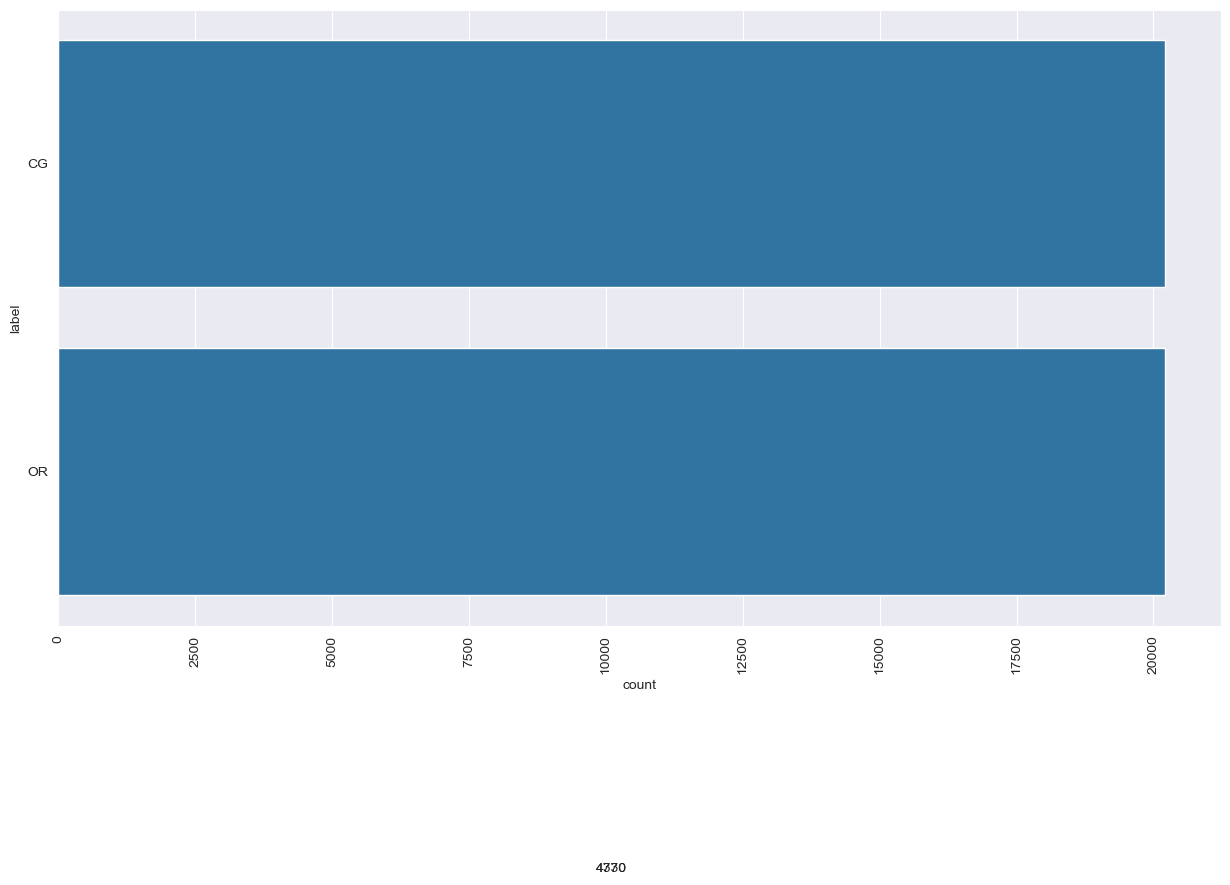

In [29]:
plt.figure(figsize = (15,8))
sns.set_style("darkgrid")
ax = sns.countplot(data['label'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
i = 0 
# to show count values on top
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1.5,
        data['category'].value_counts()[i],ha="center")
    i += 1

In [ ]:
# Checking if null value is present in any column

In [31]:
data.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [33]:
data.category.value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

C:\Users\Lokesh J\AppData\Local\Temp\ipykernel_9072\1182388676.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
C:\Users\Lokesh J\AppData\Local\Temp\ipykernel_9072\1182388676.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['category'].value_counts()[i],ha="center")
C:\Users\Lokesh J\AppData\Local\Temp\ipykernel_9072\1182388676.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['category'].value_counts()[i],ha="center")
C:\Users\Lokesh J\AppData\Local\Temp\ipyke

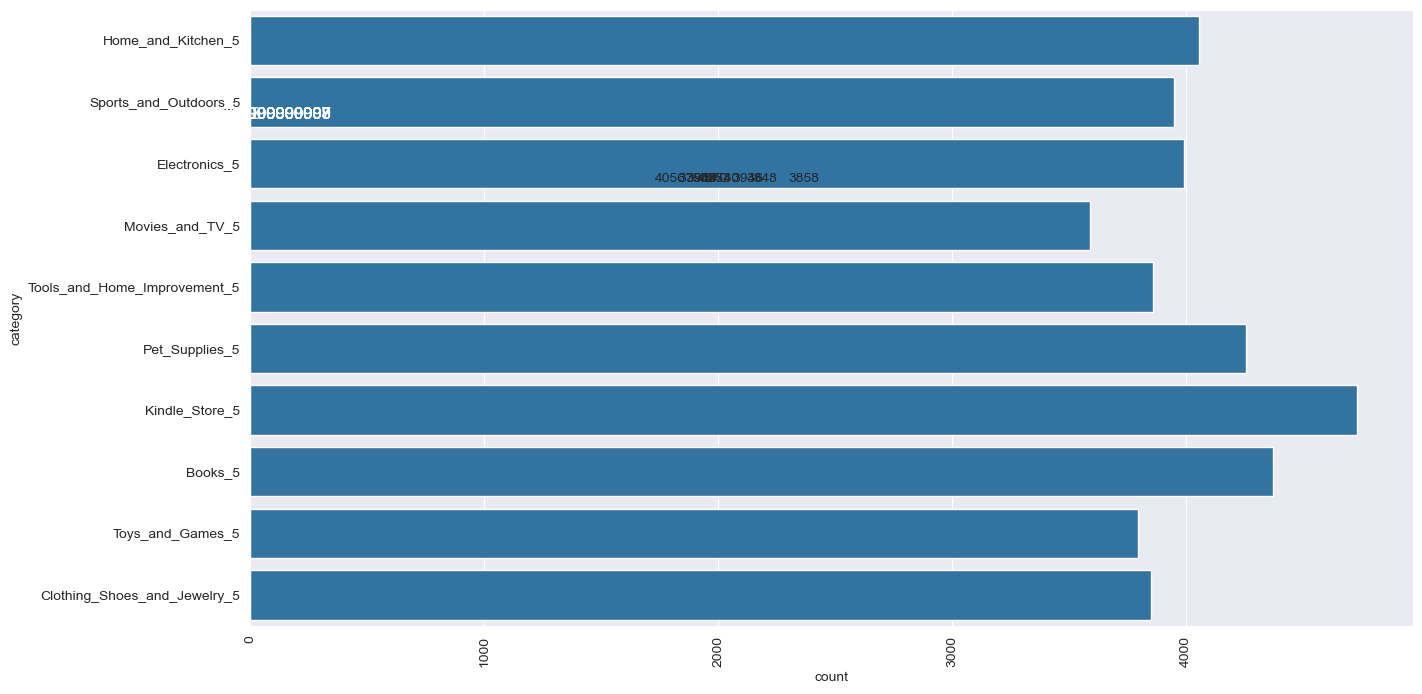

In [35]:
plt.figure(figsize = (15,8))
sns.set_style("darkgrid")
ax = sns.countplot(data['category'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
i = 0 
# to show count values on top
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1.5,
        data['category'].value_counts()[i],ha="center")
    i += 1

# to show count values on bar

for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=12)


# Exploratory Data Analysis

# Data Cleaning

# Pre-processing and cleaning Text uisng NLTK toolkit

In [ ]:
# Steps
# 1. Transform into Lower case
# 2. Removing Stop Words
# 3. Removing Noise
# 4. Stemming
# 5. Lemmatizing

In [37]:
#stemmed_list and lemmatized_list

# Converting the text into lower case
data["text_"] = [x.lower() for x in data['text_']]

# data["text_"] = [x for x in data['text_'] if x not in STOP_WORDS ]
# Converting text data into a list
list_text = data.text_.astype(str).to_list()


# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_list = []

for i, textwrap in enumerate(list_text):

  lemmatized_list1 = []
  LL1 = []
  for word in textwrap.split():
    lemmatized_list1.append(lemmatizer.lemmatize(word = word, pos = 'v'))

  for l in lemmatized_list1:
    LL1.append(lemmatizer.lemmatize(word = l))

  lemmatized_list.append(" ".join(LL1))


# STEMMING STARTS

# 3 types = Porter Stemmer, Snowball stemmer, Lancaster stemmer
stemmed_list = []
for id, textwrap in enumerate(lemmatized_list):

  stemmed_list1 = []
  for word in str(textwrap).lower().split():
    stemmed_list1.append(PorterStemmer().stem(word = word))
  stemmed_list.append(" ".join(stemmed_list1))

final_text = stemmed_list

# Noise remover
# Intentionally not removed "-" 

punctuations = """!\"#$%&'()*+/:;<=>?@[\\]^_.`{|}~"""

final_list = []
for i, title in enumerate(final_text):
  html_list = ' '
  for word in title.split():
    word = re.sub("(<.*?>)","",word)
    
    if '-' not in word:
      word = re.sub("(\\W|\\d)"," ",word)
    else:
      final = ''
      for i in word:
        if i not in punctuations:
          final += i
        else:
          final += ''
      word = final

    #remove whitespace
    word = word.strip()

    html_list += word + " "
  final_list.append(html_list)


data['CleanedText'] = final_list
data['CleanedText'] = data['CleanedText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))

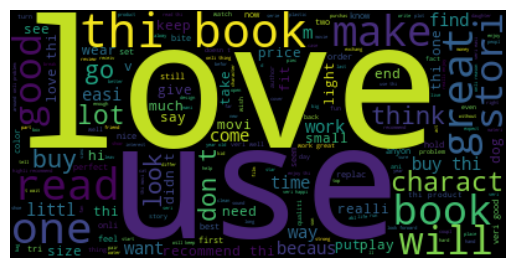

In [39]:
# Create and generate a word cloud image:

wordcloud = WordCloud().generate(' '.join(x for x in final_list))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
data.head()

,category,rating,label,text_,CleanedText
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",love well made sturdy veri comfortable love ve...
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",love great upgrad original v mine coupl year
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,thi pillow save back love look feel thi pillow
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,veri nice set good quality set two month


In [45]:
data.to_csv('Fake_review_cleaned.csv')

# Applying BOW(Bag of Words) on uncleaned data

In [39]:
from sklearn.feature_extraction.text import CountVectorizer  ## BOW Model
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [41]:
bow_vect=CountVectorizer()
bow=bow_vect.fit_transform(data['text_'].values)

In [43]:
bow.shape

(40432, 41099)

# TF-IDF on the uncleaned data

In [45]:
tfidf_vect=TfidfVectorizer()
tfidf=tfidf_vect.fit_transform(data['text_'].values)

In [47]:
tfidf.shape

(40432, 41099)

In [49]:
for x in data['text_'].iloc[:5].values:
    print(x,"\n\n")

love this!  well made, sturdy, and very comfortable.  i love it!very pretty 


love it, a great upgrade from the original.  i've had mine for a couple of years 


this pillow saved my back. i love the look and feel of this pillow. 


missing information on how to use it, but it is a great product for the price!  i 


very nice set. good quality. we have had the set for two months now and have not been 




In [51]:
for x in data['CleanedText'].iloc[:5].values:
    print(x,"\n\n")

love well made sturdy veri comfortable love veri pretti 


love great upgrad original v mine coupl year 


thi pillow save back love look feel thi pillow 


miss inform use great product price 


veri nice set good quality set two month 




In [53]:
# Clean pre-processed text is added as a new column
data.head()

,category,rating,label,text_,CleanedText
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",love well made sturdy veri comfortable love ve...
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",love great upgrad original v mine coupl year
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,thi pillow save back love look feel thi pillow
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,veri nice set good quality set two month


# Applying BOW on cleaned Data

In [55]:
bow_vect = CountVectorizer()
bow = bow_vect.fit_transform(data['CleanedText'].values)

In [57]:
bow.shape

(40432, 36909)

In [59]:
tfidf_vect=TfidfVectorizer()
tfidf=tfidf_vect.fit_transform(data['CleanedText'].values)

In [61]:
tfidf.shape

(40432, 36909)

# BOW after Cleaning

# Using 2000 points

In [63]:
from sklearn.manifold import TSNE 
X = bow[:2000, :].toarray()

In [65]:
tsne = TSNE(n_components = 2, perplexity = 20).fit_transform(X)
df = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df = pd.concat([df, data['label'].iloc[:2000]], axis = 1)

Text(0.5, 1.0, 'Perplexity = 20')

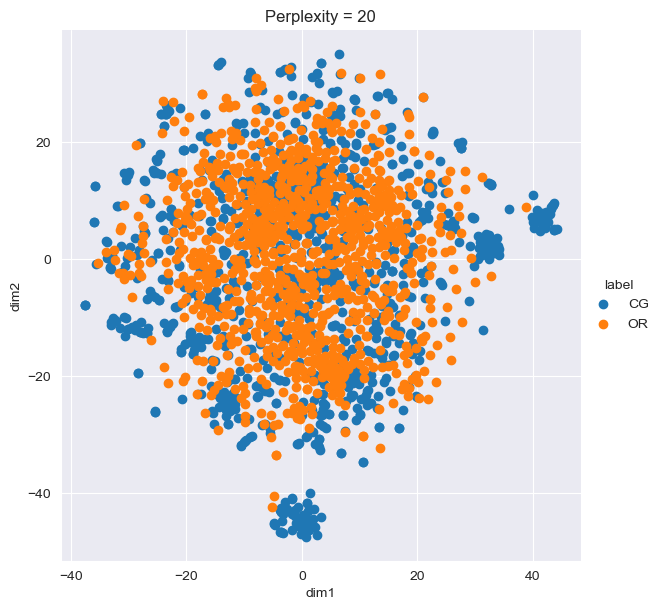

In [67]:
sns.FacetGrid(df, hue = 'label', height = 6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 20')

# Using 10,000 points

In [69]:
X = bow[:10000, :].toarray()

Text(0.5, 1.0, 'Perplexity = 20')

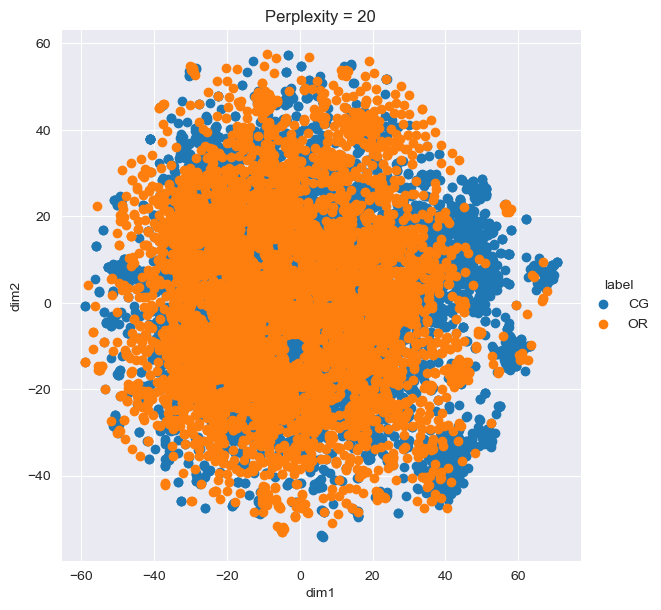

In [71]:
tsne = TSNE(n_components = 2, perplexity = 20).fit_transform(X)
df = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df = pd.concat([df, data['label'].iloc[:10000]], axis = 1)
sns.FacetGrid(df, hue = 'label', height = 6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 20')

# TF-IDF after Cleaning

In [73]:
tf_idf_vect = TfidfVectorizer()
tf_idf = tf_idf_vect.fit_transform(data['CleanedText'].values)
tf_idf.shape

(40432, 36909)

# Taking 2000 points

In [75]:
Y = tf_idf[:2000, :].toarray()

Text(0.5, 1.0, 'Perplexity = 20')

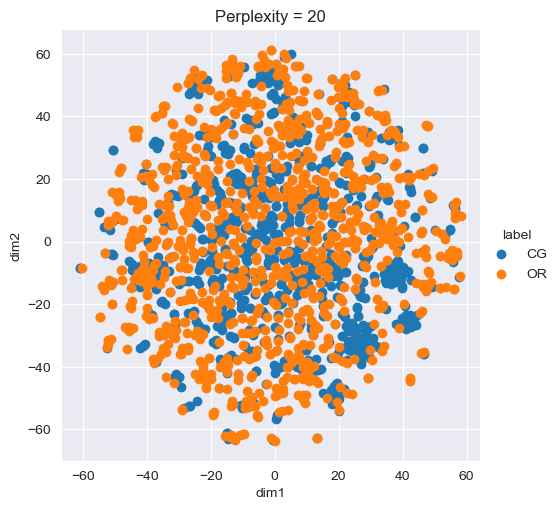

In [77]:
tsne = TSNE(n_components = 2, perplexity = 20).fit_transform(Y)
df1 = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df1 = pd.concat([df1, data['label'].iloc[:2000]], axis = 1)
sns.FacetGrid(df1, hue = 'label', height = 5).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 20')

# Taking 10,000 points

In [190]:
Y = tf_idf[:10000, :].toarray()

Text(0.5, 1.0, 'Perplexity = 7')

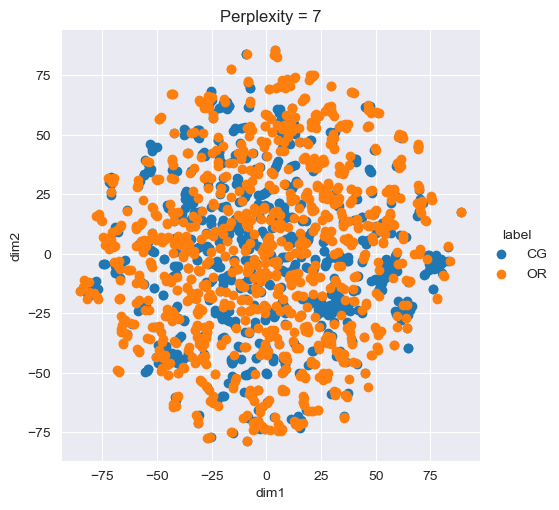

In [79]:
tsne = TSNE(n_components = 2, perplexity = 7).fit_transform(Y)
df1 = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df1 = pd.concat([df1, data['label'].iloc[:10000]], axis = 1)
sns.FacetGrid(df1, hue = 'label', height = 5).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 7')

# Applying Word2Vec

In [81]:
data['CleanedText'].values[0]

'love well made sturdy veri comfortable love veri pretti'

In [83]:
list_of_sent = [] * len(data['CleanedText'])
for i in range(len(data['CleanedText'])):
  list_of_sent.append(data['CleanedText'][i].split())

In [85]:
list_of_sent[1]

['love', 'great', 'upgrad', 'original', 'v', 'mine', 'coupl', 'year']

In [210]:
pip install --upgrade scipy

  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [214]:
pip install --upgrade gensim

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 811.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/24.0 MB 4.6 MB/s eta 0:00:06
    --------------------------------------- 0.5/24.0 MB 5.0 MB/s eta 0:00:05
   - -------------------------------------- 0.8/24.0 MB 5.6 MB/s eta 0:00:05
   - -------------------------------------- 1.0/24.0 MB 5.5 MB/s eta 0:00:05
   -- ------------------------------------- 1.2/24.0 MB 5.2 MB/s eta 0:00:05
   -- ------------------------------------- 1.6/24.0 MB 5.5 MB/s eta 0:00:05
   --- ------------------------------------ 1.9/24.0 MB 5.7 MB/s eta 0:00:04
   --- ------------------------------------ 2.2/24.0 MB 5.7 MB/s eta 0:00:04
   ---- -

In [93]:
import gensim  
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,vector_size=50, workers=-1)

In [97]:
import gensim
print(gensim.__version__)

4.3.3


In [99]:
words = list(w2v_model.wv.index_to_key)
print(len(words))

11132


In [101]:
def calc_avg_w2v(list_of_sent, w2v_model):
    '''This function takes in 2 parameters as follows:
       1. list_of_sent - This is the list of sentences/reviews for which sentence vetors are to be constructed
       2. w2v_model - This is the Word2Vec model which is trained on the working corpus - contains the word vectors
       
       Return Value:
       sent_vectors - This is a list of sentence/review vectors constructed by averaging the word vectors
    '''
    
    ## Initialize an empty list
    sent_vectors = []
    ## Consider one sentence/review at a time
    for sent in list_of_sent:
        ## Initialize sentence vector to 0
        sent_vec = np.zeros(50)
        ## Initialize count of words to 0
        cnt_words = 0
        ## Consider the words one by one
        for word in sent:
            try:
                ## Calculate the word vector using the W2V model
                vec = w2v_model.wv[word]
                ## Add the word vector to the sentence vector (This is the numerator)
                sent_vec += vec
                ## Sum all the word counts (This is the denominator)
                cnt_words += 1
            except:
                pass
        ## Divide the numerator by the denominator to get the sentence vector
        sent_vec /= cnt_words
        ## Add the sentence vector in the final list
        sent_vectors.append(sent_vec)
    ## return the list of all the sentence vectors
    return sent_vectors

In [103]:
## Preparing the data to call the function

## Make sure "list_of_sent" is imported from the pickle file
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,vector_size=50, workers=4)

In [105]:
import numpy as np
## This takes around 15 minutes
sent_vectors = calc_avg_w2v(list_of_sent, w2v_model)

C:\Users\Lokesh J\AppData\Local\Temp\ipykernel_2824\4003961033.py:30: RuntimeWarning: invalid value encountered in divide
  sent_vec /= cnt_words


In [107]:
len(sent_vectors)

40432

In [109]:
sent_vectors[0]

array([ 0.67821103,  0.72311819,  0.13237592, -1.22009483,  0.19066878,
       -0.5516924 , -1.57032386,  1.77423457,  0.66910704,  0.02375651,
       -0.39095303, -1.40810344, -0.9931602 ,  0.60997013,  0.64351406,
       -0.10045932, -1.18535357,  2.76616416,  0.65380937,  0.07966347,
        2.5503619 , -0.09928458,  0.27513085,  0.06665038, -0.25689506,
        2.22605658,  0.23642101, -0.68201724,  0.70140788,  0.24359447,
       -0.73262456, -1.3766299 ,  2.04101396, -0.50328747, -0.6848792 ,
       -0.36611514, -0.32916594, -2.42874336, -0.67943539, -0.8085351 ,
       -0.91889631,  1.60086845, -0.37084255, -0.18000458,  1.7625912 ,
        1.1784232 ,  0.0047225 , -1.43609532, -0.33069357,  0.37891317])

In [111]:
# Saving the Vectors in pkl form, to avoid running scripts again.
import pickle
with open('sent_vec_avg_w2v.pkl', 'wb') as pickle_file:
    pickle.dump(sent_vectors, pickle_file)

In [113]:
with open('sent_vec_avg_w2v.pkl', 'rb') as pickle_file:
    sent_vectors = pickle.load( pickle_file)

# Machine Learning Models

In [117]:
pip install keras


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------- ---------------------- 20.5/48.7 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 620.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------- -------------------------------- 0.2/1.2 MB 4.6 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.2 MB 6.7 MB/s eta 0:00:01
   ---------------------------- ----------- 0.9/1.2 MB 6.2 MB/s eta 0:00:01
   ------------------------------------- -- 1.1/1.2 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/213.2 kB ? eta -:--:--
   -------------------------------------- - 204.8/213.2 kB 6.3 MB/s eta 0:00:01
   -------------

In [121]:
pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 1.4 MB/s eta 0:04:31
   ---------------------------------------- 0.2/390.3 MB 1.7 MB/s eta 0:03:53
   ---------------------------------------- 0.2/390.3 MB 1.5 MB/s eta 0:04:16
   ---------------------------------------- 0.3/390.3 MB 1.4 MB/s eta 0:04:30
   ---------------------------------------- 0.4/390.3 MB 1.6 MB/s eta 0:04:02
   ---------------------------------------- 0.5/390.3 MB 1.6 MB/s eta 0:04:12
   ---------------------------------------- 0.5/390.3 MB 1.5 MB/s eta 0:04:29
   ---------------------------------------- 0.6/390.3 MB 1.5 MB/s eta 0:04:15
   ---------------------------------------- 0.7/390.3 MB 1.5 MB/s eta 0:04:22
   ---------------------------------------- 0.7/390.3 MB 1.5 MB/s eta 0:04:25
   ---------------------------------------- 0.8/390.3 MB 1.5 MB/s eta 0:04:23


In [125]:
# Importing all the required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #For plotting graphs
import itertools
np.random.seed(32)

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection, naive_bayes, svm #Machine learning classifiers
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [127]:
data.head()

,category,rating,label,text_,CleanedText
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",love well made sturdy veri comfortable love ve...
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",love great upgrad original v mine coupl year
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,thi pillow save back love look feel thi pillow
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,veri nice set good quality set two month


(array([ 2155.,     0.,  1967.,     0.,     0.,  3786.,     0.,  7965.,
            0., 24559.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

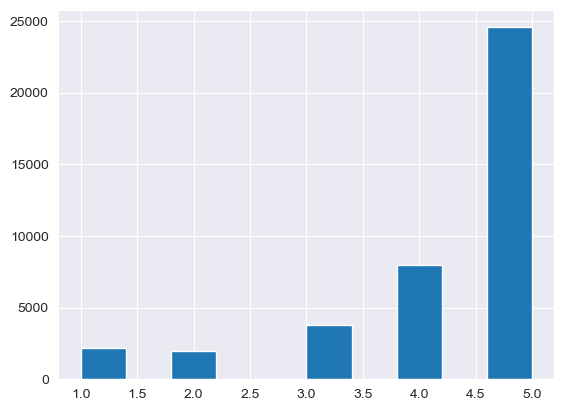

In [129]:
plt.hist(data['rating'])

In [131]:
Y = data["label"];
#X = data["text_"]
X = data["CleanedText"]
X = np.array(X)

Y = Y.replace({'CG':True, 'OR':False})
Y

C:\Users\Lokesh J\AppData\Local\Temp\ipykernel_2824\1181472829.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = Y.replace({'CG':True, 'OR':False})


0         True
1         True
2         True
3         True
4         True
         ...  
40427    False
40428     True
40429    False
40430     True
40431    False
Name: label, Length: 40432, dtype: bool

In [199]:
data.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


# Train and Test Splits

In [133]:
train_text, test_text, train_y, test_y = train_test_split(X,Y,test_size = 0.2)

# Data standardization

In [135]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y)
test_y = Encoder.fit_transform(test_y)

In [ ]:
#CG=1
#OR=0

In [137]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(data["CleanedText"])
Train_X_Tfidf = Tfidf_vect.transform(train_text)
Test_X_Tfidf = Tfidf_vect.transform(test_text)

#Printing the vocabulary
print(Tfidf_vect.vocabulary_)

{'love': 19373, 'well': 35765, 'made': 19637, 'sturdy': 31442, 'veri': 34986, 'comfortable': 6610, 'pretti': 25183, 'great': 14048, 'upgrad': 34633, 'original': 22987, 'mine': 20796, 'coupl': 7403, 'year': 36632, 'thi': 32730, 'pillow': 24299, 'save': 28257, 'back': 2562, 'look': 19273, 'feel': 11857, 'miss': 20956, 'inform': 16523, 'use': 34734, 'product': 25354, 'price': 25212, 'nice': 22078, 'set': 28923, 'good': 13790, 'quality': 25860, 'two': 33923, 'month': 21235, 'want': 35472, 'differ': 9019, 'flavor': 12307, 'perfect': 23949, 'touch': 33292, 'onli': 22810, 'thing': 32753, 'wish': 36170, 'littl': 19118, 'space': 30393, 'fit': 12214, 'smooth': 29969, 'edg': 10270, 'extra': 11461, 'big': 3389, 'number': 22454, 'easi': 10192, 'read': 26334, 'like': 18963, 'size': 29624, 'son': 30263, 'comfort': 6609, 'also': 1250, 'babi': 2548, 'advertised': 818, 'th': 32605, 'one': 22799, 'problem': 25314, 'realli': 26373, 'handi': 14531, 'kid': 17920, 'tool': 33185, 'includ': 16326, 'package': 2

In [139]:
print(Train_X_Tfidf)

  (0, 4541)	0.4912292874357826
  (0, 6610)	0.3354356852474744
  (0, 12587)	0.37315777476818984
  (0, 19118)	0.21187266731567675
  (0, 19273)	0.22513025062379166
  (0, 22078)	0.23436448161373472
  (0, 29230)	0.37625830815150657
  (0, 30104)	0.46352915955896906
  (1, 1120)	0.2651239388309554
  (1, 1645)	0.22319857428124906
  (1, 2619)	0.15050372046891147
  (1, 3750)	0.261384163296408
  (1, 4062)	0.18728780819391164
  (1, 11743)	0.16390623350074374
  (1, 14048)	0.14710029169429426
  (1, 18590)	0.1768700648445287
  (1, 19814)	0.2117326485223268
  (1, 22021)	0.134918417290392
  (1, 23329)	0.2370062063587394
  (1, 24485)	0.29819053028248943
  (1, 25130)	0.26320059657947986
  (1, 25895)	0.20478868570848247
  (1, 26369)	0.18747144568786506
  (1, 26741)	0.33410129636982683
  (1, 28885)	0.1440281716032556
  :	:
  (32344, 6681)	0.2721178946290914
  (32344, 11025)	0.17761231864639804
  (32344, 11678)	0.21302211828716316
  (32344, 12104)	0.12037145813458971
  (32344, 13595)	0.1219508179273569
  (32

In [141]:
Train_X_Tfidf.shape

(32345, 36909)

In [143]:
train_y.shape

(32345,)

# Applying different ML models:

In [145]:
# fitting the training dataset on the Naive Bayes(NB) classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,train_y)
# predicting the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Deriving accuracy from the model using accuracy_score function
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, test_y)*100)

Naive Bayes Accuracy Score ->  85.05008037591196


In [147]:
# Printing the classification report for Naive bayes classifier
print(classification_report(test_y, predictions_NB))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      4024
           1       0.82      0.91      0.86      4063

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087



In [149]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [151]:
#Deriving Confusion matrix from Naive Bayes Classifier Predictions
cm_NB = confusion_matrix(test_y, predictions_NB)
cm_NB

array([[3198,  826],
       [ 383, 3680]], dtype=int64)

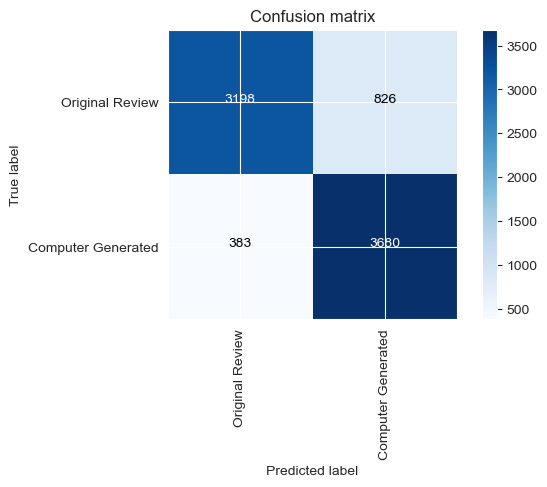

In [153]:
#Plotting confusion matrix for Naive Bayes classifier
plot_confusion_matrix(cm_NB, 
            classes = ['Original Review', 'Computer Generated'])
# The output below shows the colorful plot of the confusion matrix along with labels names

In [155]:
# fitting the training dataset on the Support Vector Machine(SVM) classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,train_y)
# predicting the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Deriving accuracy from the model using accuracy_score function
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_y)*100)

SVM Accuracy Score ->  87.12748856188945


In [157]:
# Printing the classification report for Support Vector Machine(SVM) classifier
print(classification_report(test_y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4024
           1       0.87      0.87      0.87      4063

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



In [159]:
#Deriving Confusion matrix from SVM Classifier Predictions
cm_SVM = confusion_matrix(test_y, predictions_SVM)
cm_SVM

array([[3518,  506],
       [ 535, 3528]], dtype=int64)

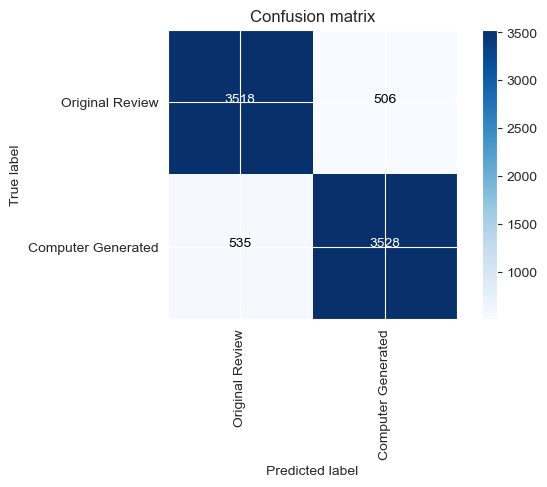

In [161]:
#Plotting confusion matrix for Support Vector Machine(SVM) classifier
plot_confusion_matrix(cm_SVM, 
            classes = ['Original Review', 'Computer Generated'])
# The output below shows the colorful plot of the confusion matrix along with labels names

In [163]:
# fitting the training dataset on Random Forest classifier
Ran_forest = RandomForestClassifier()
Ran_forest.fit(Train_X_Tfidf,train_y)
# predicting the labels on validation dataset
predictions_rfc = Ran_forest.predict(Test_X_Tfidf)
# Deriving accuracy from the model using accuracy_score function
print("Random Forest Accuracy Score -> ",accuracy_score(predictions_rfc, test_y)*100)

Random Forest Accuracy Score ->  85.64362557190552


In [165]:
# Printing the classification report for Random Forest classifier
print(classification_report(test_y,predictions_rfc))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4024
           1       0.84      0.88      0.86      4063

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



In [167]:
#Deriving Confusion matrix from Random Forest Classifier Predictions
cm_RFC = confusion_matrix(test_y, predictions_rfc)
cm_RFC

array([[3355,  669],
       [ 492, 3571]], dtype=int64)

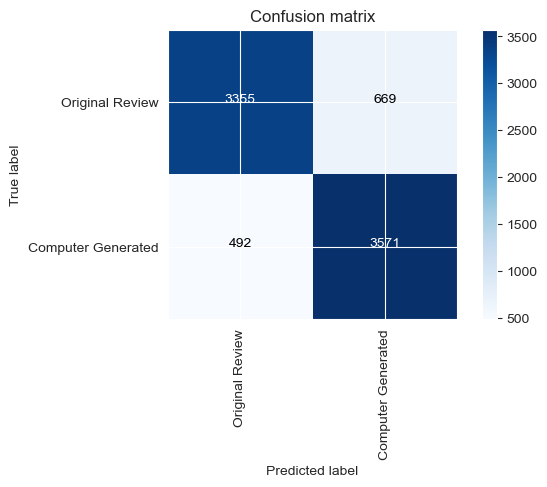

In [169]:
#Plotting Confusion matrix for Random Forest Classifier
plot_confusion_matrix(cm_RFC, 
            classes = ['Original Review', 'Computer Generated'])
# The output below shows the colorful plot of the confusion matrix along with labels names

In [171]:
#x_train,x_test,y_train,y_test = train_test_split(data.drop("label", axis = 1),data['label'],test_size=0.2, random_state = 1)

# 2. Testing NN

In [175]:
pip install keras-preprocessing


   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   --------- ------------------------------ 10.2/42.6 kB ? eta -:--:--
   ---------------------------------------- 42.6/42.6 kB 414.6 kB/s eta 0:00:00


In [187]:
# libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
np.random.seed(32)


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

from keras_preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


%matplotlib inline

In [189]:
# Create the same folder structure in your drive under Colab Notebooks "SWM" upload the dataset in SWM Folder with the name "fake reviews dataset.csv" 

data = pd.read_csv("fake reviews dataset.csv")

In [191]:
data.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


(array([ 2155.,     0.,  1967.,     0.,     0.,  3786.,     0.,  7965.,
            0., 24559.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

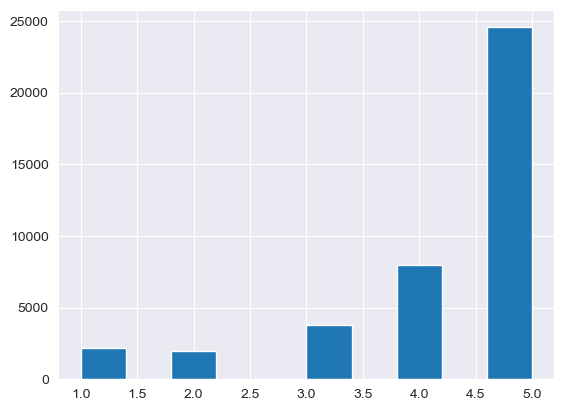

In [193]:
plt.hist(data['rating'])

In [201]:
Y = data["label"];
X = data["text_"]

X = np.array(X)

Y = Y.replace({'CG':True, 'OR':False})
Y

C:\Users\Lokesh J\AppData\Local\Temp\ipykernel_2824\3765095334.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = Y.replace({'CG':True, 'OR':False})


0         True
1         True
2         True
3         True
4         True
         ...  
40427    False
40428     True
40429    False
40430     True
40431    False
Name: label, Length: 40432, dtype: bool

In [203]:
train_text, test_text, train_y, test_y = train_test_split(X,Y,test_size = 0.2)

In [205]:
train_text.shape

(32345,)

In [207]:
MAX_NB_WORDS = 17000
# 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

C:\Users\Lokesh J\anaconda3\Lib\site-packages\keras_preprocessing\text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 39041 unique tokens.


In [209]:
sequences[0]

[72, 142, 484, 126, 18, 19, 913, 5, 7, 3, 45, 1084, 10, 14, 507, 18]

In [211]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 67.6
max length: 486


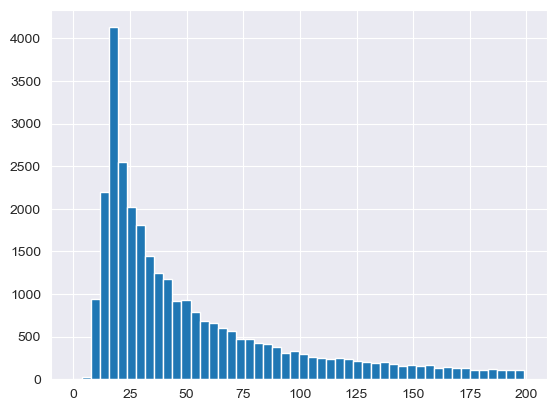

In [213]:
plt.hist([l for l in seq_lens if l < 200], bins=50);

In [215]:
MAX_SEQUENCE_LENGTH = 125
# 250, 100, 
# 80, 
# 70, 

# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (32345, 125)
Shape of data test tensor: (8087, 125)


In [217]:
y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
print('Shape of label tensor:', y_train.shape)

Shape of label tensor: (32345, 2)


In [219]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model

EMBEDDING_DIM = 50

N_CLASSES = 2

# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)

average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(N_CLASSES, activation='sigmoid')(average)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop', metrics=['acc'])

model.fit(x_train, y_train, validation_split=0.1,
          epochs=50, batch_size=120)
#           epochs=20, batch_size=100)


output_test = model.predict(x_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))
test_casses = np.argmax(output_test, axis=-1)
print("test accuracy:", np.mean(test_casses == y_test))

C:\Users\Lokesh J\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - acc: 0.5503 - loss: 0.6799 - val_acc: 0.5994 - val_loss: 0.6368
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.7045 - loss: 0.6025 - val_acc: 0.7651 - val_loss: 0.5370
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.7413 - loss: 0.5252 - val_acc: 0.7546 - val_loss: 0.4881
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.7547 - loss: 0.4894 - val_acc: 0.7988 - val_loss: 0.4398
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - acc: 0.7666 - loss: 0.4588 - val_acc: 0.8155 - val_loss: 0.4149
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.7844 - loss: 0.4409 - val_acc: 0.7505 - val_loss: 0.4567
Epoch 7/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - acc: 0.7751 - loss: 0.4389 - val_acc: 0.8108 - val_loss: 0.4000
Epoch 8/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.7982 - loss: 0.4094 - val_acc: 0.8022 - val_loss: 0.3943
Epoch 9/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/

# -LSTM

In [221]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
predictions = Dense(2, activation='sigmoid')(x)


model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['acc'])

model.fit(x_train, y_train, validation_split=0.1,
          epochs=3, batch_size=100)

output_test = model.predict(x_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))

Epoch 1/3
292/292 ━━━━━━━━━━━━━━━━━━━━ 55s 176ms/step - acc: 0.8871 - loss: 0.2886 - val_acc: 0.8964 - val_loss: 0.2519
Epoch 2/3
292/292 ━━━━━━━━━━━━━━━━━━━━ 52s 177ms/step - acc: 0.9248 - loss: 0.1959 - val_acc: 0.9066 - val_loss: 0.2433
Epoch 3/3
292/292 ━━━━━━━━━━━━━━━━━━━━ 82s 176ms/step - acc: 0.9340 - loss: 0.1716 - val_acc: 0.9236 - val_loss: 0.1925
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step
test auc: 0.9786167318021479


# -CNN+LSTM:

In [232]:
# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

# 1D convolution with 64 output channels
x = Conv1D(64, 5)(embedded_sequences)
# MaxPool divides the length of the sequence by 5
x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)
x = Conv1D(64, 5)(x)
x = MaxPooling1D(5)(x)
# LSTM layer with a hidden size of 64
x = Dropout(0.2)(x)
x = LSTM(64)(x)
predictions = Dense(2, activation='sigmoid')(x)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['acc'])

model.fit(x_train, y_train, validation_split=0.1,
          epochs=5, batch_size=60)

output_test = model.predict(x_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))

Epoch 1/5
486/486 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - acc: 0.8712 - loss: 0.2830 - val_acc: 0.9215 - val_loss: 0.1917
Epoch 2/5
486/486 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - acc: 0.9447 - loss: 0.1440 - val_acc: 0.9270 - val_loss: 0.1983
Epoch 3/5
486/486 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - acc: 0.9517 - loss: 0.1279 - val_acc: 0.9354 - val_loss: 0.1675
Epoch 4/5
486/486 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - acc: 0.9587 - loss: 0.1111 - val_acc: 0.9301 - val_loss: 0.1701
Epoch 5/5
486/486 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - acc: 0.9617 - loss: 0.1040 - val_acc: 0.9385 - val_loss: 0.1749
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
test auc: 0.9807125741734678


# Evaluation Metrics

# Comparative Study between ML and DL Models